In [1]:
import pandas as pd
import numpy as np

In [2]:
np.__version__

'1.23.5'

### Predicting heart disease using machine-learning
This notebook will look into various python libraries to build a machine learning model cable of predicting whether or not someone has heart disease based on medical attributes.
WE're going to take the following steps:
1. Problem defination
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

### Problem defination: 
same as stated above

### Data
The original data came from UCI machine learning repository
https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?select=heart.csv

### Evaluation
If we reach 95% accuracy at predicting wheather or not a patient has heart disease during the proof of concept we will persue the project

### Features
***Create data dictionary***

1. age
age in years

2. sex
(1 = male; 0 = female)

3. cp
chest pain type

4. trestbps
resting blood pressure (in mm Hg on admission to the hospital)

5. chol
serum cholestoral in mg/dl

6. fbs
(fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)

7. restecg
resting electrocardiographic results

8. thalach
maximum heart rate achieved

9. exang
exercise induced angina (1 = yes; 0 = no)

10. oldpeak
ST depression induced by exercise relative to rest

### Preparing the tools

In [3]:
# Import all the tools we need
# Regular eda(explanatory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Models from scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
#Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
# from sklearn.metrics import plot_roc_curve

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (C:\Users\gaura\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

### Load data

In [4]:
df= pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## Data exploration (exploratory data analysis or EDA)
This is to find more about the data and become a subject matter expert on the dataset you're working on


In [5]:
# Let's find out how much of each class there
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<Axes: >

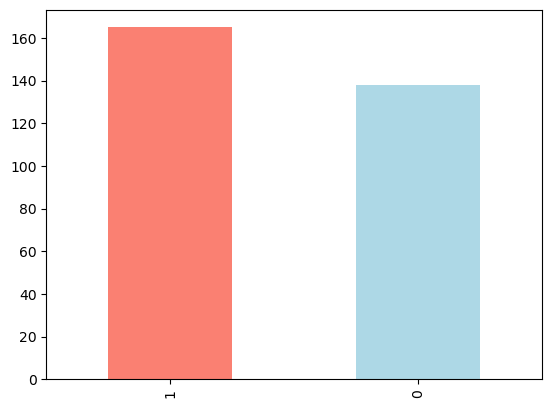

In [6]:
df["target"].value_counts().plot(kind="bar", color=["salmon","lightblue"])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Are there any missing value?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to sex

In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

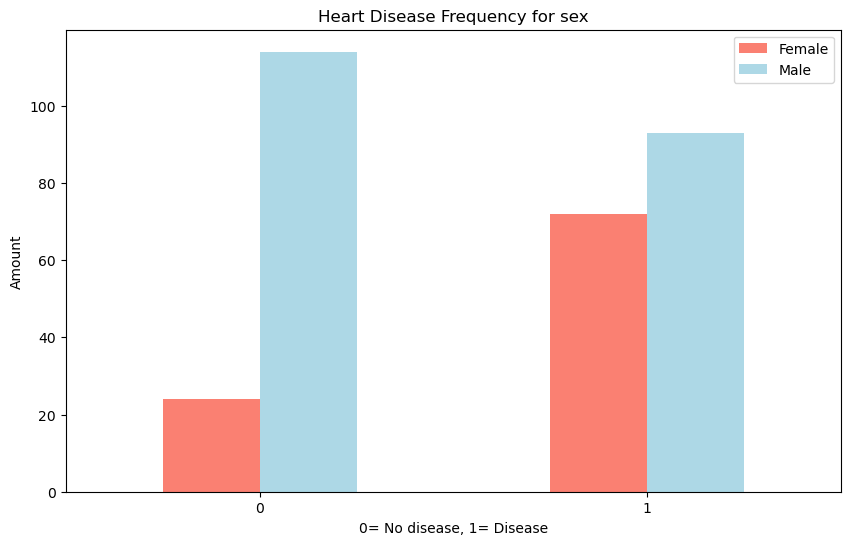

In [12]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency for sex")
plt.xlabel("0= No disease, 1= Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)

In [13]:
df["thalach"].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

### Age vs Max Heart rate for heart disease

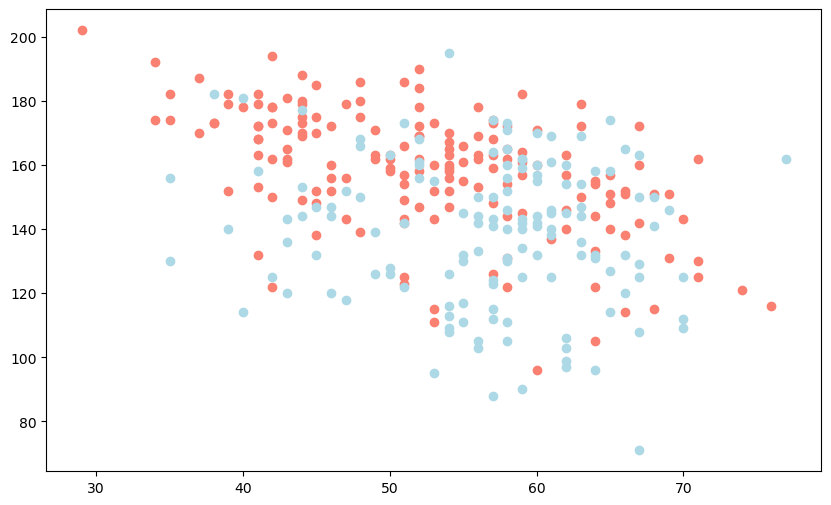

In [14]:
# Create another figure
plt.figure(figsize=(10,6))
#Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon")
# Scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue")

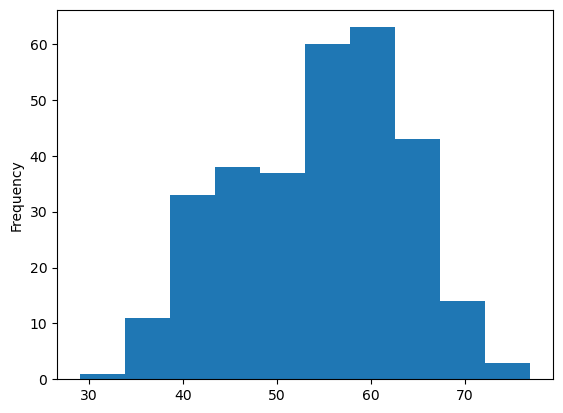

In [15]:
# Check the distribution of the age column with a histogram
df.age.plot(kind="hist");
# df.age.plot.hist();

### Heart disease frequency per chest pain type


In [16]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

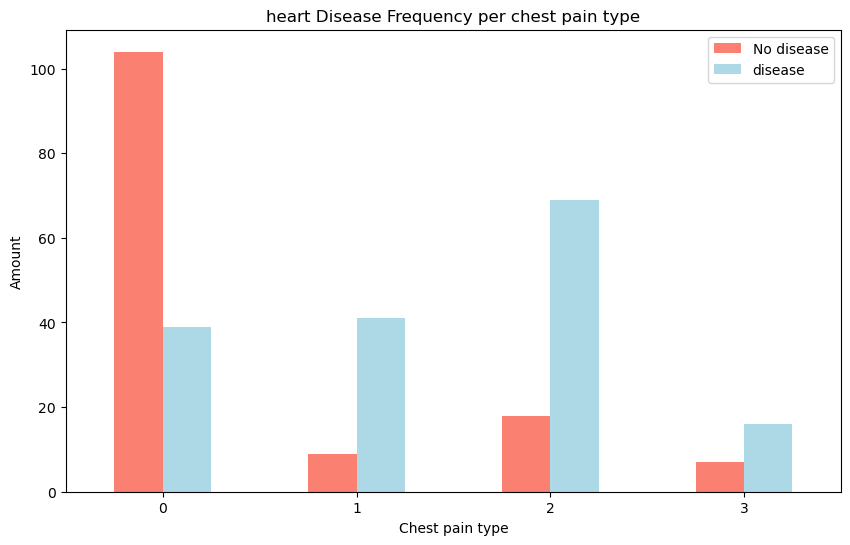

In [17]:
# Make crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10,6), color=["salmon","lightblue"])
plt.title("heart Disease Frequency per chest pain type")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(["No disease", "disease"])
plt.xticks(rotation=0)

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
#df

In [20]:
# make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


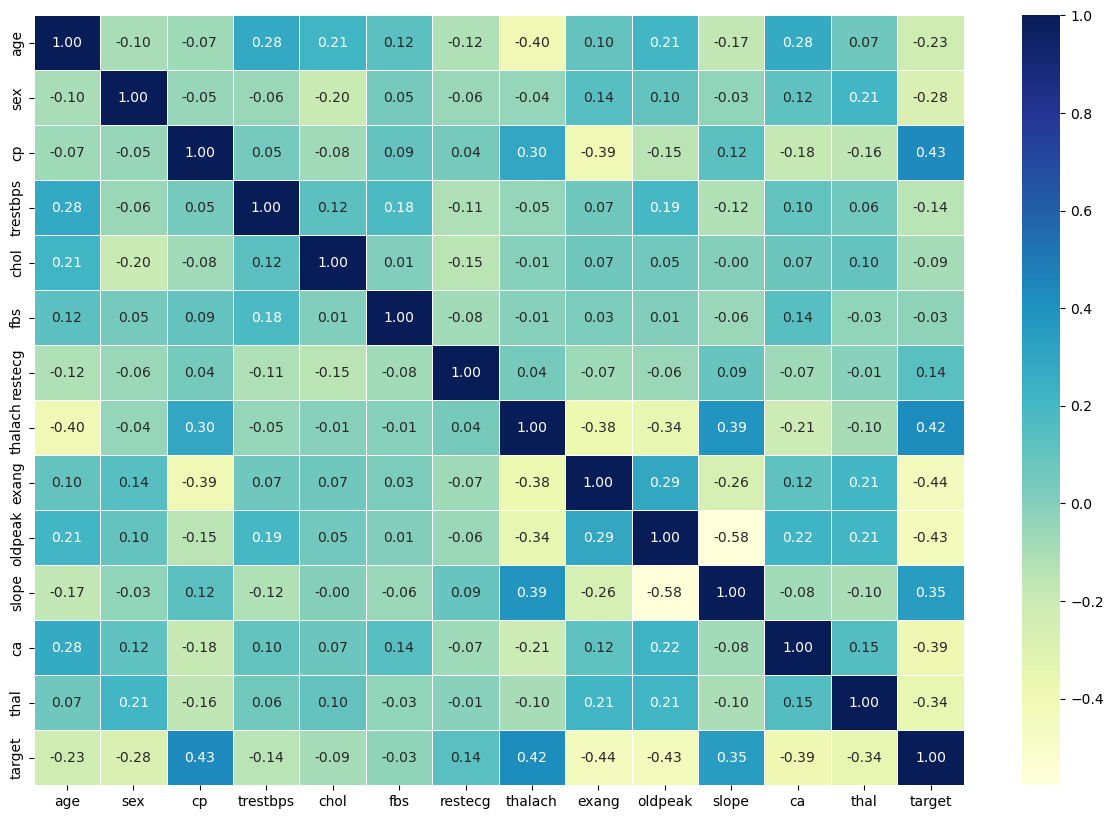

In [21]:
# let's make our correlation matrix a little prettier
corr_matrix= df.corr()
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
fig, ax = plt.subplots(figsize=(15,10))
ax= sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f",
               cmap="YlGnBu");

### Modelling

In [22]:
#Split data into x and y
x= df.drop("target", axis=1)
y= df["target"]

In [23]:
#Split data into train and test split
np.random.seed(42)
# Split into train and test sets
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2)

In [24]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


Now after spliting data into time to build machine learning model
we'll train it and then test it
We're going to try 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest CLassifier

In [25]:
# Put models in a dictionary
models= {"Logistic Regression":LogisticRegression(),
        "KNN": KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier()}
# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    # Set random seed
    np.random.seed(42)
    #Make a dictionary to keep model scores
    model_scores={}
    #Loop through models
    for name, model in models.items():
        #Fit the model to the data
        model.fit(x_train, y_train)
        #Evaluate the model and append its score to model_scores
        model_scores[name]= model.score(x_test, y_test)
    return model_scores
    

In [26]:
model_scores= fit_and_score(models=models, x_train=x_train, x_test = x_test, y_train=y_train, y_test= y_test)
model_scores

C:\Users\gaura\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

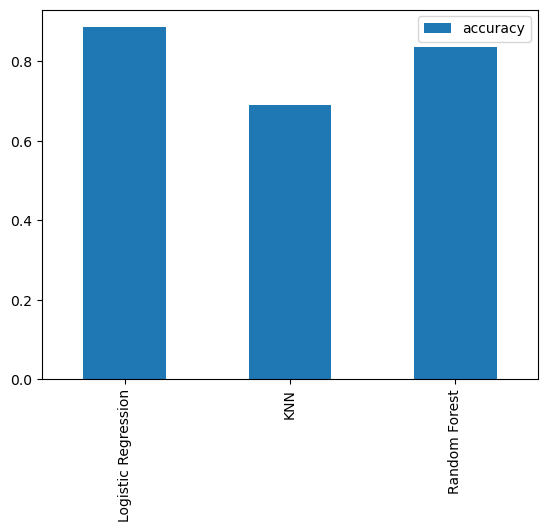

In [27]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

### Evaluating models
Now we've got a baseline model and we know a model's first predictions aren't always what we should based our next steps off. What should we do?
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross- Validation
* Precision
* Recall
* F1 score
* Classification report
* ROC Curve
* Area under the curve (AUC)

### Hyperparameter tuning

In [28]:
# Let's tune KNN
train_scores=[]
test_scores=[]
# Create a list of different values for n_neighbors
neighbors=range(1,21)
# Setup KNN instance
knn= KNeighborsClassifier()
# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    # Fit the algorithm
    knn.fit(x_train, y_train)
    # update the training score list
    train_scores.append(knn.score(x_train, y_train))
    # update the test score list
    test_scores.append(knn.score(x_test, y_test))

In [29]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [30]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

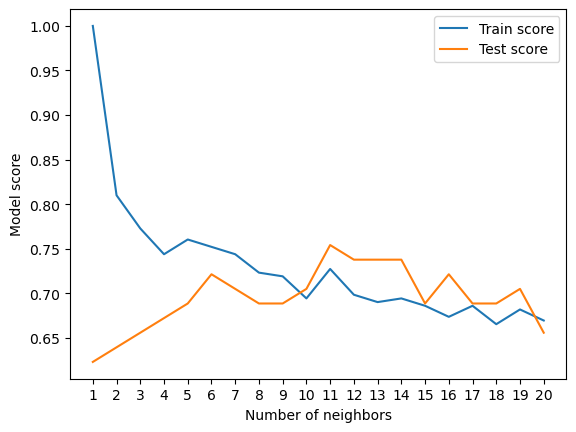

In [31]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xlabel("Number of neighbors")
plt.xticks(np.arange(1,21,1))
plt.ylabel("Model score")
plt.legend()

In [32]:
print(f"Maximum KNN score on the test data:{max(test_scores)*100:.2f}%")

Maximum KNN score on the test data:75.41%


maximum value of test data is around 11

### Hyperparameter tuning with RandomizedSearchCV
We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

...using RandomizedSearchCV

In [33]:
# Create a hyperparameters grid for logisticRegression and random forest
log_reg_grid={"C": np.logspace(-4,4,20),
             "solver":["liblinear"]}
rf_grid={"n_estimators": np.arange(10,1000,50),
        "max_depth":[None,3,5,10],
        "min_samples_leaf":np.arange(1,20,2)}

Now we've got hyprparameter grids setup for each of our models, let's tune them using RandomizedSearchCV..

In [34]:
# Tune logisticRegression
np.random.seed(42)
#setup random hyperparameter search for logisticRegression
rs_log_reg= RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True)
# fit random hyperparameter search model for logisticRegression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [35]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [36]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

Now we have tuned LogisticRegression(), let's do the same for RandomForestClassifier()

In [37]:
#Setup random seed
np.random.seed(42)
#Setup random hyperparameter search for RandomForestClassifier
rs_rf= RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions=rf_grid,
                         cv=5,
                         n_iter=20,
                         verbose=True)
# Fit random hyperparamter search model for RandomForestClassifier()
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [38]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 760, 'min_samples_leaf': 19, 'max_depth': 3}

In [39]:
# evaluate the randomized search RandomForestClassifier model
rs_rf.score(x_test, y_test)

0.8688524590163934

### Hyperparameter Tuning with GridSearchCV
Since our LogisticRegression model provides th ebest scores so far, we'll try and improve them again using GridSearchCV

In [40]:
# Different hyperparameters for our LogisticRegression Model
log_reg_grid={"C": np.logspace(-4,4,30),
             "solver":["liblinear"]}
#Setup grid hyperparameter search for logisticregression
gs_log_reg= GridSearchCV(LogisticRegression(),
                        param_grid=log_reg_grid,
                        cv=18,
                        verbose=True)
#gs_log_reg.fit(x_train, y_train);

In [41]:
gs_log_reg.fit(x_train, y_train);

Fitting 18 folds for each of 30 candidates, totalling 540 fits


In [42]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [43]:
gs_log_reg.score(x_test, y_test)

0.8852459016393442

## Evaluating our tuned machine learing classifier, beyond accuracy (predicted data comparison with test data)
* ROC curve and AUC score
* Confusion matrix
* Classification report 
* Precision
* F1-score

... and it would be great if cross validation was used where possible

In [44]:
# Make predictions with tuned model
y_preds= gs_log_reg.predict(x_test)

In [45]:
# Plot ROC Curve and calculate AUC metric
# plot_roc_curve(gs_log_reg, x_test, y_test)

NameError: name 'plot_roc_curve' is not defined

In [ ]:
# AUC score of 0.93, pretty well ;)

In [46]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


In [47]:
# to improve the visualization we will use seaborn

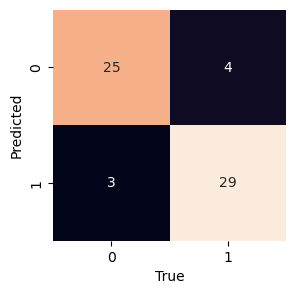

In [48]:
def plot_conf_mat(y_test, y_preds):
    fig,ax= plt.subplots(figsize=(3,3))
    ax= sns.heatmap(confusion_matrix(y_test, y_preds),
                   annot=True,
                   cbar=False)
    plt.xlabel("True")
    plt.ylabel("Predicted")
plot_conf_mat(y_test, y_preds)
    

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classificatio report as well as cross validation precision, recall and f1-score

In [49]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using cross-val_score()

In [50]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [51]:
# Create a new classifier with best parameters
clf=LogisticRegression(C=0.20433597178569418, solver="liblinear")

In [52]:
# Cross validation accuracy
cv_acc=cross_val_score(clf,
                      x,
                      y,
                      cv=5,
                      scoring="accuracy")


In [53]:
cv_acc=np.mean(cv_acc)

In [54]:
cv_acc

0.8446994535519124

In [55]:
# Cross validation precision
cv_pre=cross_val_score(clf,
                      x,
                      y,
                      cv=5,
                      scoring="precision")
cv_pre=np.mean(cv_pre)
cv_pre

0.8207936507936507

In [56]:
# Cross validation recall
cv_recall=cross_val_score(clf,
                      x,
                      y,
                      cv=5,
                      scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.9212121212121213

In [57]:
# Cross validation f1-score
cv_f1=cross_val_score(clf,
                      x,
                      y,
                      cv=5,
                      scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8673007976269721

<Axes: title={'center': 'Cross validated classification metrics'}>

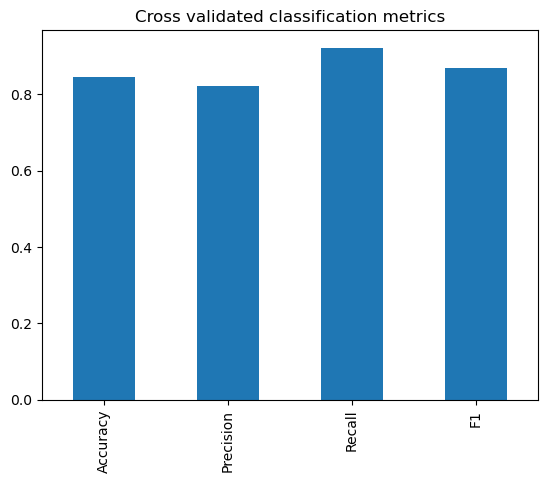

In [58]:
# Visualize cross validated metrics
cv_metrics=pd.DataFrame({"Accuracy": cv_acc,
                        "Precision": cv_pre,
                        "Recall": cv_recall,
                        "F1": cv_f1},
                       index=[0])
cv_metrics.T.plot.bar(title="Cross validated classification metrics",
                     legend=False)

### Feature Importance
Feature importance is another as asking, which features contributed most to the outcomes of the model and how did they contribute?

Let's find the features importance for our LogisticRegression model..

In [59]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [60]:
clf= LogisticRegression(C=0.20433597178569418,
                       solver="liblinear")

In [61]:
clf.fit(x_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [62]:
# Check coef_
clf.coef_
# coef_ tells how much each column is contributing to predict target

array([[ 0.00316728, -0.86044674,  0.66067031, -0.01156993, -0.00166375,
         0.04386101,  0.31275865,  0.02459362, -0.60413094, -0.56862789,
         0.45051632, -0.63609908, -0.67663375]])

In [63]:
# Match coef's of features to columns
feature_dict= dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672830780218957,
 'sex': -0.8604467440762573,
 'cp': 0.6606703120090932,
 'trestbps': -0.011569932037408597,
 'chol': -0.00166374523064295,
 'fbs': 0.043861009724542044,
 'restecg': 0.3127586507840532,
 'thalach': 0.024593615555173243,
 'exang': -0.6041309439103262,
 'oldpeak': -0.5686278914396258,
 'slope': 0.4505163222528207,
 'ca': -0.6360990763634887,
 'thal': -0.6766337475895309}

<Axes: title={'center': 'Feature Importance'}>

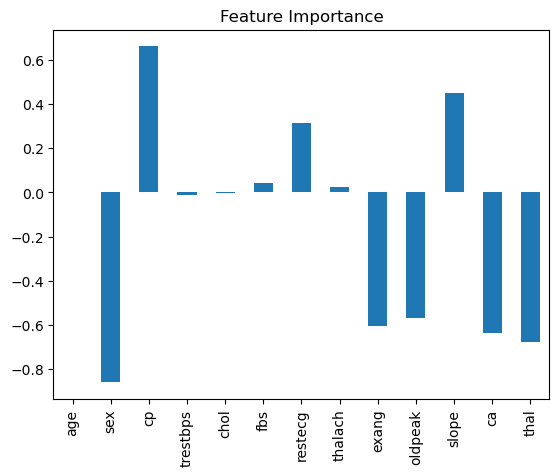

In [64]:
# Visulaize feature importance
feature_df= pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False)

## Experimentation
If you have'nt hit ypur evaluation metric yet ..ask yourself..
* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the current models? (beyond what we have done so far)
* If your model is good enogh you can share it with others

In [65]:
import pickle

# Save the trained model to a pkl file
with open('model.pkl', 'wb') as file:
    pickle.dump(clf, file)